<a href="https://colab.research.google.com/github/SoroushShahsafi/INSE6220/blob/main/Soroush.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Multiclass Classification with PyCaret**

Multiclass classification is a supervised machine learning technique where the goal is to classify instances into one of three or more classes. (Classifying instances into one of two classes is called Binary Classification).

**Install Pycaret**

In [ ]:
# install slim version (default): if you get an error message, run it again
!pip install pycaret==2.3.6

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Run the below code in your notebook to check the installed version
from pycaret.utils import version
version()

'2.3.6'

**Import Libraries**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd
plt.rcParams['figure.figsize'] = (7,5)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
print("Pandas version: ", pd.__version__)
print("Seaborn version: ", sns.__version__)

Pandas version:  1.3.5
Seaborn version:  0.11.2


**Dataset**

The examined group comprised kernels belonging to three different varieties of wheat: Kama, Rosa and Canadian, 70 elements each, randomly selected for
the experiment. High quality visualization of the internal kernel structure was detected using a soft X-ray technique. It is non-destructive and considerably cheaper than other more sophisticated imaging techniques like scanning microscopy or laser technology. The images were recorded on 13x18 cm X-ray KODAK plates. Studies were conducted using combine harvested wheat grain originating from experimental fields, explored at the Institute of Agrophysics of the Polish Academy of Sciences in Lublin.

The data set can be used for the tasks of classification and cluster analysis.


Attribute Information:

To construct the data, seven geometric parameters of wheat kernels were measured:
1. area A,
2. perimeter P,
3. compactness C = 4*pi*A/P^2,
4. length of kernel,
5. width of kernel,
6. asymmetry coefficient
7. length of kernel groove.
All of these parameters were real-valued continuous.

https://archive.ics.uci.edu/ml/datasets/seeds

In [ ]:
#read cvs file into dataframe
df = pd.read_excel('https://raw.githubusercontent.com/SoroushShahsafi/INSE6220/main/AAPL.xlsx')
df.head(25)

Date       H-L       C-O      SMA_5     SMA_10  \
0   2011-11-04 00:00:00-04:00  0.130298 -0.054494  12.189638  12.225469   
1   2011-11-07 00:00:00-05:00  0.117816 -0.005481  12.158889  12.207081   
2   2011-11-08 00:00:00-05:00  0.196057  0.122382  12.218071  12.232836   
3   2011-11-09 00:00:00-05:00  0.202753 -0.051449  12.205101  12.216640   
4   2011-11-10 00:00:00-05:00  0.458479 -0.359537  12.096417  12.157366   
5   2011-11-11 00:00:00-05:00  0.256943 -0.060582  12.001312  12.095475   
6   2011-11-14 00:00:00-05:00  0.214627 -0.129689  11.876677  12.017783   
7   2011-11-15 00:00:00-05:00  0.305956  0.244462  11.770734  11.994402   
8   2011-11-16 00:00:00-05:00  0.207625 -0.136387  11.706742  11.955921   
9   2011-11-17 00:00:00-05:00  0.276427 -0.200013  11.659189  11.877803   
10  2011-11-18 00:00:00-05:00  0.155566 -0.121165  11.600250  11.800781   
11  2011-11-21 00:00:00-05:00  0.175659 -0.042315  11.537842  11.707259   
12  2011-11-22 00:00:00-05:00  0.212800  0.167135  11.462829  11.616782   
13  2011-11-23 00:00:00-05:00  0.272774 -0.228935  11.354572  11.530657   
14  2011-11-25 00:00:00-05:00  0.238373 -0.147651  11.270305  11.464747   
15  2011-11-28 00:00:00-05:00  0.194534  0.114772  11.277489  11.438870   
16  2011-11-29 00:00:00-05:00  0.262727 -0.080371  11.303001  11.420421   
17  2011-11-30 00:00:00-05:00  0.121165  0.027703  11.337645  11.400237   
18  2011-12-01 00:00:00-05:00  0.251158  0.164090  11.465141  11.409857   
19  2011-12-02 00:00:00-05:00  0.153739 -0.003957  11.624238  11.447272   
20  2011-12-05 00:00:00-05:00  0.183270 -0.014613  11.727077  11.502283   
21  2011-12-06 00:00:00-05:00  0.159828 -0.047492  11.835151  11.569076   
22  2011-12-07 00:00:00-05:00  0.127254 -0.025572  11.877102  11.607374   
23  2011-12-08 00:00:00-05:00  0.160437 -0.024051  11.893725  11.679433   
24  2011-12-09 00:00:00-05:00  0.091635  0.023441  11.917594  11.770916   

        EMA_5     EMA_10        rsi  MACD_12_26_9         OBV  Class  
0   12.200121  12.200632  55.217571      0.097328  -978583200     -1  
1   12.189806  12.194913  54.730220      0.089135 -1248858800      0  
2   12.248891  12.226212  58.659599      0.097486  -848416800      1  
3   12.177161  12.191211  50.821173      0.076326 -1407100800     -1  
4   12.027255  12.106889  44.769144      0.034446 -2151853200     -1  
5   11.921229  12.034578  44.401769     -0.000215 -2805639200      0  
6   11.796153  11.945746  41.469938     -0.040386 -3238544400     -1  
7   11.809884  11.926036  48.152311     -0.048157 -2807733600      1  
8   11.777837  11.887438  45.821082     -0.063557 -3156944000     -1  
9   11.681785  11.815118  41.823357     -0.092772 -3636844400     -1  
10  11.592684  11.742276  40.441612     -0.120603 -4008782400     -1  
11  11.473109  11.649854  37.444108     -0.155434 -4456762800     -1  
12  11.469500  11.615750  43.233869     -0.162738 -4047741600      1  
13  11.370486  11.535152  38.407078     -0.189726 -4476012800     -1  
14  11.269772  11.450277  36.878139     -0.217014 -4730773600     -1  
15  11.329983  11.450301  45.720757     -0.205442 -4384360400      1  
16  11.340494  11.434158  44.143469     -0.201126 -4760215600     -1  
17  11.438829  11.470766  49.744724     -0.173596 -4354277200      1  
18  11.562534  11.532434  52.944307     -0.136132 -3967096000      1  
19  11.662965  11.592687  53.874469     -0.100931 -3588040400      0  
20  11.763510  11.660308  55.758097     -0.064163 -3230830400      1  
21  11.809634  11.704230  54.324634     -0.039627 -3514428400     -1  
22  11.821510  11.729872  52.861111     -0.024470 -3819174800      0  
23  11.845359  11.759542  53.973894     -0.008503 -3442818400      0  
24  11.891296  11.800202  55.987898      0.011293 -3145825200      1

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2743 entries, 0 to 2742
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          2743 non-null   object 
 1   H-L           2743 non-null   float64
 2   C-O           2743 non-null   float64
 3   SMA_5         2743 non-null   float64
 4   SMA_10        2743 non-null   float64
 5   EMA_5         2743 non-null   float64
 6   EMA_10        2743 non-null   float64
 7   rsi           2743 non-null   float64
 8   MACD_12_26_9  2743 non-null   float64
 9   OBV           2743 non-null   int64  
 10  Class         2743 non-null   int64  
dtypes: float64(8), int64(2), object(1)
memory usage: 235.9+ KB


In [ ]:
print("Number of duplicated rows is: ", df.duplicated().sum())

Number of duplicated rows is:  0


In [ ]:
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

Number of rows with NaNs is:  0


In [ ]:
del df["Date"]
df.head(5)

H-L       C-O      SMA_5     SMA_10      EMA_5     EMA_10        rsi  \
0  0.130298 -0.054494  12.189638  12.225469  12.200121  12.200632  55.217571   
1  0.117816 -0.005481  12.158889  12.207081  12.189806  12.194913  54.730220   
2  0.196057  0.122382  12.218071  12.232836  12.248891  12.226212  58.659599   
3  0.202753 -0.051449  12.205101  12.216640  12.177161  12.191211  50.821173   
4  0.458479 -0.359537  12.096417  12.157366  12.027255  12.106889  44.769144   

   MACD_12_26_9         OBV  Class  
0      0.097328  -978583200     -1  
1      0.089135 -1248858800      0  
2      0.097486  -848416800      1  
3      0.076326 -1407100800     -1  
4      0.034446 -2151853200     -1

**Exploratory Data Analysis**

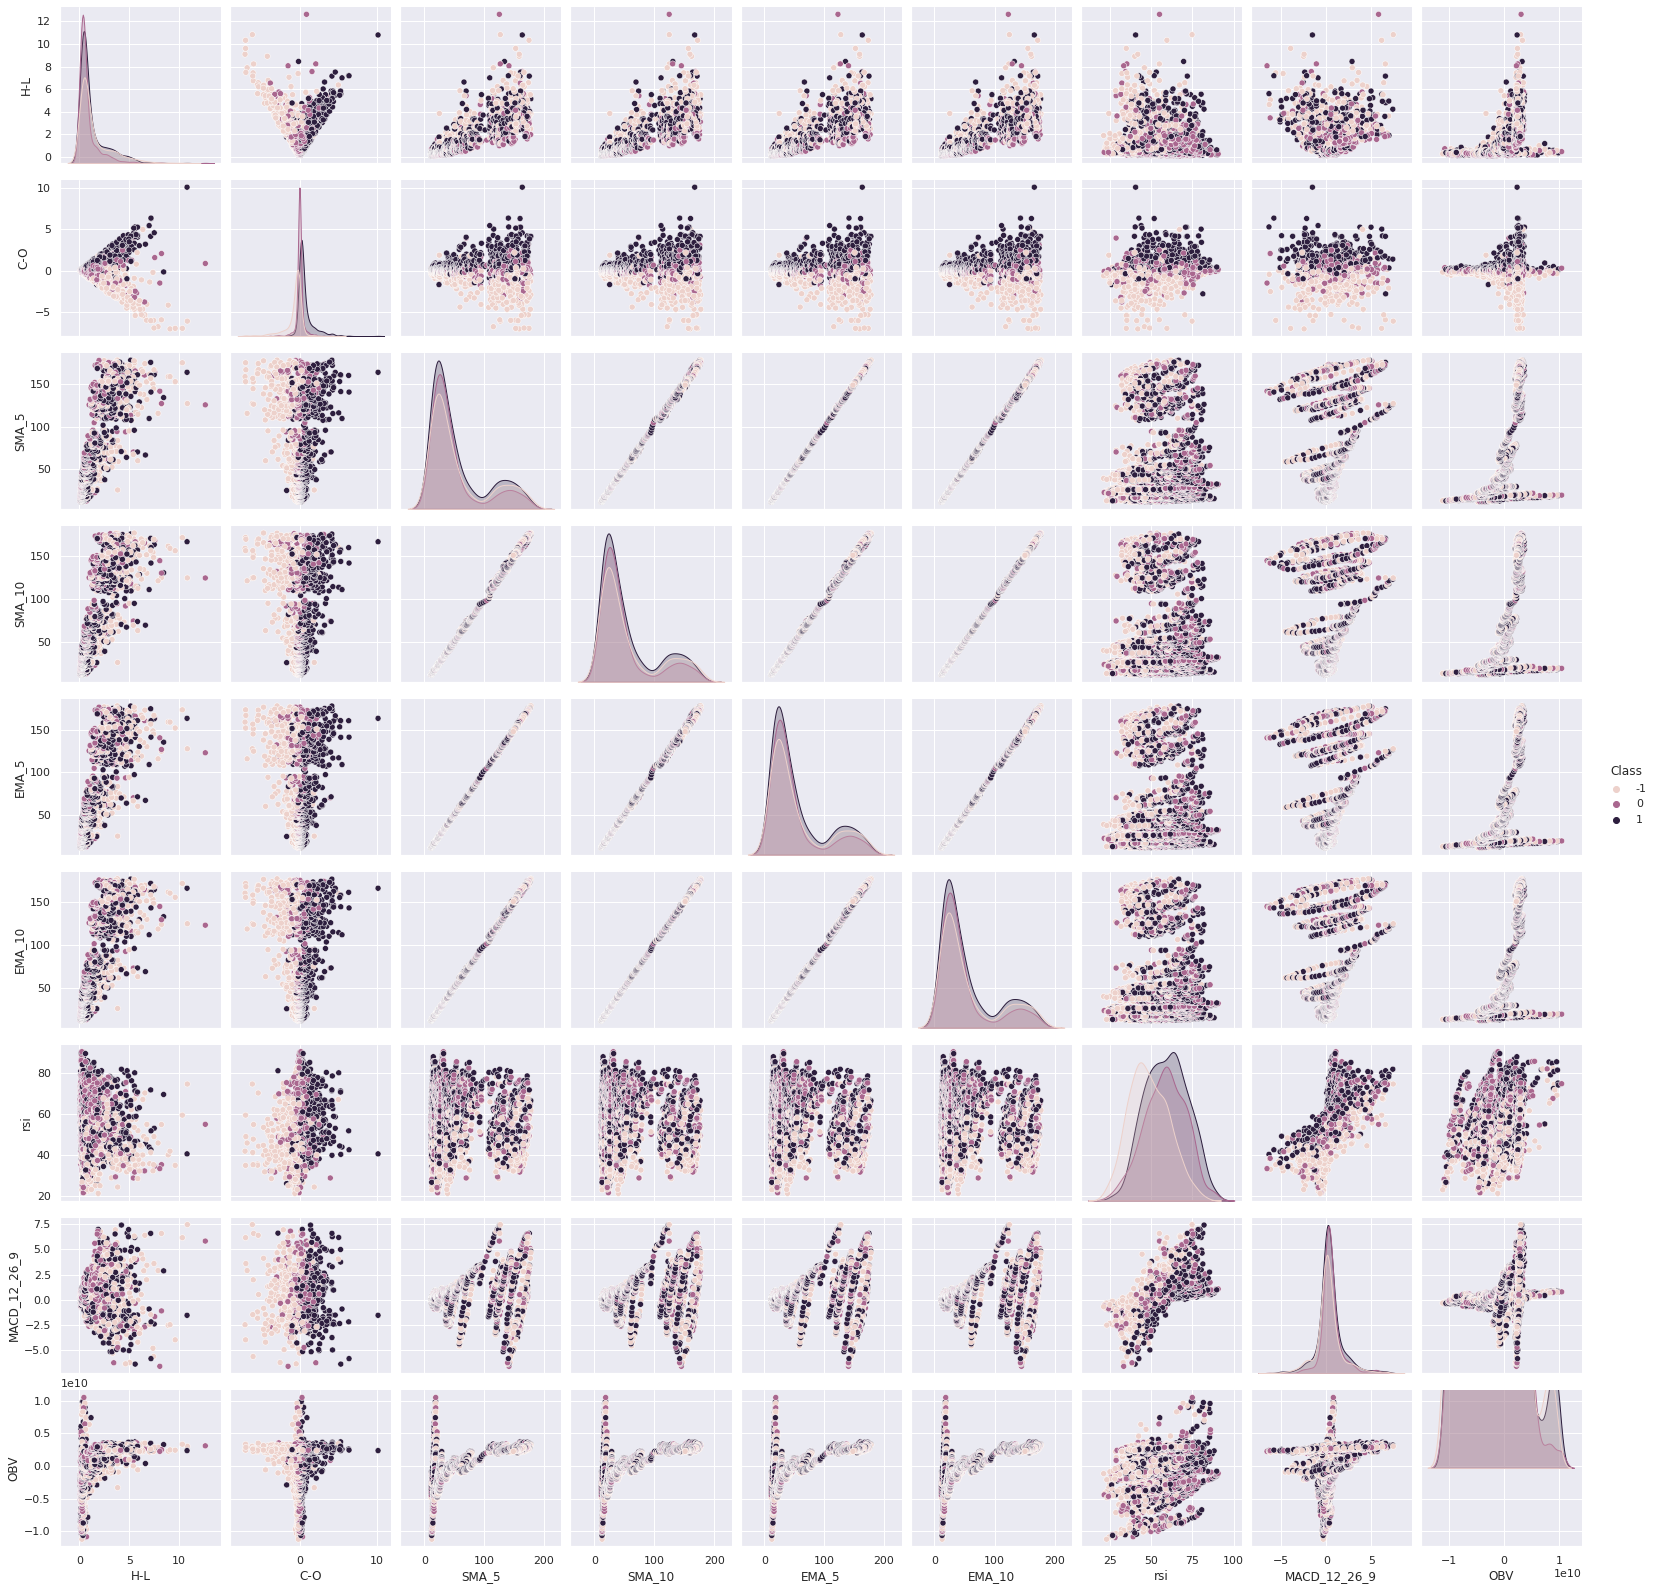

In [ ]:
sns.pairplot(df, hue='Class')
plt.show()

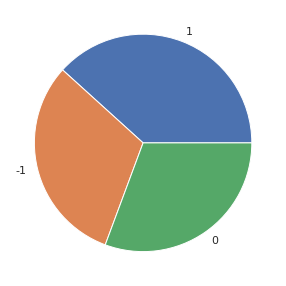

In [ ]:
y =df['Class']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

**Data Matrix**

In [ ]:
X = df.drop(columns=['Class'])
X.head(10)

H-L       C-O      SMA_5     SMA_10      EMA_5     EMA_10        rsi  \
0  0.130298 -0.054494  12.189638  12.225469  12.200121  12.200632  55.217571   
1  0.117816 -0.005481  12.158889  12.207081  12.189806  12.194913  54.730220   
2  0.196057  0.122382  12.218071  12.232836  12.248891  12.226212  58.659599   
3  0.202753 -0.051449  12.205101  12.216640  12.177161  12.191211  50.821173   
4  0.458479 -0.359537  12.096417  12.157366  12.027255  12.106889  44.769144   
5  0.256943 -0.060582  12.001312  12.095475  11.921229  12.034578  44.401769   
6  0.214627 -0.129689  11.876677  12.017783  11.796153  11.945746  41.469938   
7  0.305956  0.244462  11.770734  11.994402  11.809884  11.926036  48.152311   
8  0.207625 -0.136387  11.706742  11.955921  11.777837  11.887438  45.821082   
9  0.276427 -0.200013  11.659189  11.877803  11.681785  11.815118  41.823357   

   MACD_12_26_9         OBV  
0      0.097328  -978583200  
1      0.089135 -1248858800  
2      0.097486  -848416800  
3      0.076326 -1407100800  
4      0.034446 -2151853200  
5     -0.000215 -2805639200  
6     -0.040386 -3238544400  
7     -0.048157 -2807733600  
8     -0.063557 -3156944000  
9     -0.092772 -3636844400

In [ ]:
X.describe().transpose()

count          mean           std           min           25%  \
H-L           2743.0  1.182418e+00  1.454635e+00  5.449389e-02  3.108016e-01   
C-O           2743.0  3.055014e-02  1.135119e+00 -7.048117e+00 -2.229964e-01   
SMA_5         2743.0  5.400445e+01  4.713936e+01  1.127031e+01  2.133187e+01   
SMA_10        2743.0  5.387756e+01  4.704844e+01  1.140024e+01  2.139121e+01   
EMA_5         2743.0  5.400376e+01  4.713055e+01  1.126977e+01  2.134344e+01   
EMA_10        2743.0  5.387600e+01  4.702925e+01  1.143416e+01  2.137681e+01   
rsi           2743.0  5.560401e+01  1.332191e+01  2.107191e+01  4.566213e+01   
MACD_12_26_9  2743.0  3.703984e-01  1.484101e+00 -6.586840e+00 -1.604764e-01   
OBV           2743.0 -7.924203e+08  3.203506e+09 -1.118600e+10 -2.699720e+09   

                       50%           75%           max  
H-L           5.355968e-01  1.425120e+00  1.263625e+01  
C-O           1.840941e-02  2.696738e-01  1.011425e+01  
SMA_5         3.378781e+01  6.553773e+01  1.783370e+02  
SMA_10        3.361204e+01  6.526391e+01  1.773030e+02  
EMA_5         3.371641e+01  6.556098e+01  1.783874e+02  
EMA_10        3.359465e+01  6.544415e+01  1.770371e+02  
rsi           5.563268e+01  6.518814e+01  9.063298e+01  
MACD_12_26_9  2.371143e-01  7.575418e-01  7.442918e+00  
OBV          -4.604768e+08  1.750677e+09  1.047650e+10

**Standardize the Data**

In [ ]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(10)

H-L       C-O     SMA_5    SMA_10     EMA_5    EMA_10       rsi  \
0 -0.723420 -0.074934 -0.887208 -0.885464 -0.887137 -0.886320 -0.029013   
1 -0.732002 -0.031748 -0.887861 -0.885855 -0.887356 -0.886442 -0.065602   
2 -0.678206  0.080916 -0.886605 -0.885307 -0.886102 -0.885776  0.229408   
3 -0.673601 -0.072252 -0.886880 -0.885651 -0.887625 -0.886520 -0.359086   
4 -0.497768 -0.343716 -0.889186 -0.886911 -0.890806 -0.888314 -0.813460   
5 -0.636341 -0.080299 -0.891204 -0.888227 -0.893056 -0.889852 -0.841041   
6 -0.665437 -0.141191 -0.893849 -0.889879 -0.895710 -0.891741 -1.061157   
7 -0.602640  0.188483 -0.896097 -0.890376 -0.895419 -0.892160 -0.559458   
8 -0.670251 -0.147092 -0.897454 -0.891194 -0.896099 -0.892981 -0.734482   
9 -0.622944 -0.203155 -0.898463 -0.892854 -0.898137 -0.894519 -1.034623   

   MACD_12_26_9       OBV  
0     -0.184031 -0.058123  
1     -0.189552 -0.142507  
2     -0.183924 -0.017483  
3     -0.198185 -0.191912  
4     -0.226409 -0.424435  
5     -0.249768 -0.628557  
6     -0.276840 -0.763716  
7     -0.282078 -0.629211  
8     -0.292456 -0.738239  
9     -0.312145 -0.888072

In [ ]:
X.describe().transpose()

count          mean       std       min       25%       50%  \
H-L           2743.0  8.289234e-17  1.000182 -0.775542 -0.599309 -0.444744   
C-O           2743.0 -1.036154e-17  1.000182 -6.237196 -0.223406 -0.010698   
SMA_5         2743.0 -1.657847e-16  1.000182 -0.906714 -0.693232 -0.428948   
SMA_10        2743.0  4.144617e-17  1.000182 -0.903007 -0.690613 -0.430816   
EMA_5         2743.0 -4.144617e-17  1.000182 -0.906881 -0.693102 -0.430529   
EMA_10        2743.0  2.072308e-16  1.000182 -0.902621 -0.691168 -0.431328   
rsi           2743.0 -9.791657e-16  1.000182 -2.592600 -0.746416  0.002153   
MACD_12_26_9  2743.0 -4.144617e-17  1.000182 -4.688703 -0.357773 -0.089824   
OBV           2743.0 -4.144617e-17  1.000182 -3.245030 -0.595487  0.103638   

                   75%       max  
H-L           0.166877  7.875457  
C-O           0.210698  8.885006  
SMA_5         0.244708  2.638033  
SMA_10        0.242058  2.623847  
EMA_5         0.245262  2.639612  
EMA_10        0.246023  2.619297  
rsi           0.719558  2.629905  
MACD_12_26_9  0.260908  4.766395  
OBV           0.793993  3.518324

**Observations and variables**

In [ ]:
observations = list(df.index)
variables = list(df.columns)
print(observations)
print(variables)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

**Box and Whisker Plots**

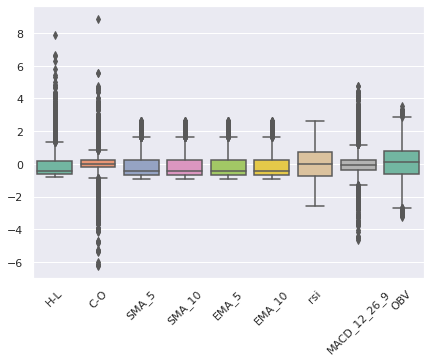

In [ ]:
ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

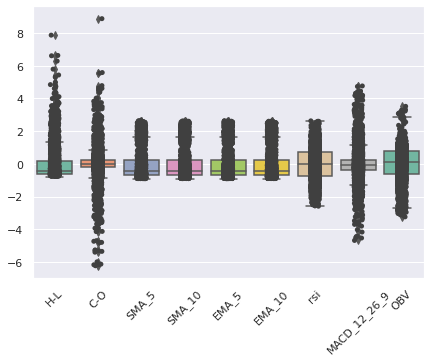

In [ ]:
# Use swarmplot() or stripplot to show the datapoints on top of the boxes:
#plt. figure()
ax = plt.figure()    
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25") 
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

**Correlation Matrix**

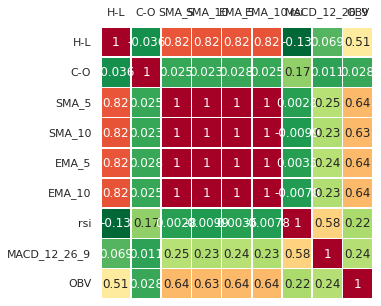

In [ ]:
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.5, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

#X.corr().style.background_gradient(cmap='coolwarm').set_precision(2)
#sns.clustermap(X.corr(), annot=True, fmt='.2f')

##**Principal Component Analysis (PCA)**

In [ ]:
pca = PCA()
Z = pca.fit_transform(X)

# 1(Decrease)->-1,  2(Fixed)->0, 3(Increase)->+1
idx_Decrease = np.where(y == -1)
idx_Fixed = np.where(y == 0)
idx_Increase = np.where(y == 1)

plt. figure()
plt.scatter(Z[idx_Decrease,0], Z[idx_Decrease,1], c='r', label='Decrease')
plt.scatter(Z[idx_Fixed,0], Z[idx_Fixed,1], c='g', label='Fixed')
plt.scatter(Z[idx_Increase,0], Z[idx_Increase,1], c='b', label='Increase')
plt.legend()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')

**Eigenvectors**

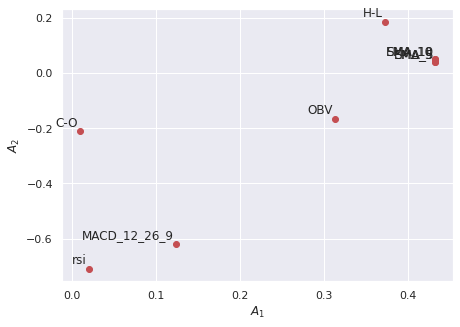

In [ ]:
A = pca.components_.T 

plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')

/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


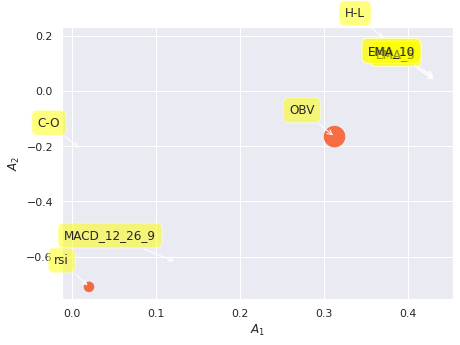

In [ ]:
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

**Scree plot**

array([5.23493476e+00, 1.64197482e+00, 9.92281433e-01, 5.50956089e-01,
       3.31982191e-01, 2.50835056e-01, 2.77635747e-04, 3.16884547e-05,
       8.60113734e-06])

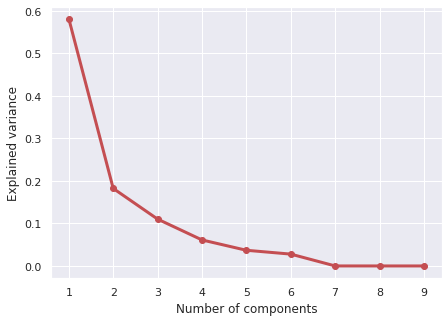

In [ ]:
#Eigenvalues
Lambda = pca.explained_variance_ 

#Scree plot
x = np.arange(len(Lambda)) + 1
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 

Lambda

**Explained Variance**

Text(0, 0.5, 'Cumulative explained variance')

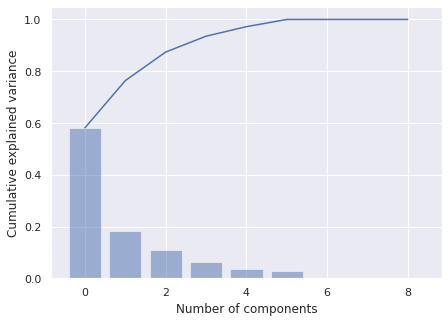

In [ ]:
ell = pca.explained_variance_ratio_
ind = np.arange(len(ell))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

**Biplot**

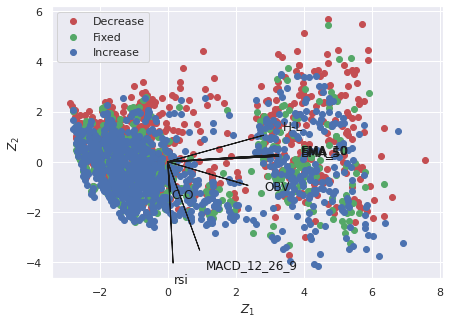

In [ ]:
# 0,1 denote PC1 and PC2; change values for other PCs
A1 = A[:,0] 
A2 = A[:,1]
Z1 = Z[:,0] 
Z2 = Z[:,1]

plt.figure()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
  plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
  plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')

plt.scatter(Z[idx_Decrease,0], Z[idx_Decrease,1], c='r', label='Decrease')
plt.scatter(Z[idx_Fixed,0], Z[idx_Fixed,1], c='g', label='Fixed')
plt.scatter(Z[idx_Increase,0], Z[idx_Increase,1], c='b', label='Increase')
plt.legend(loc='upper left')

##**Using PCA Library**

In [ ]:
!pip install pca

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for adjustText: filename=adjustText-0.7.3-py3-none-any.whl size=7096 sha256=459b4fc738357eee9ff8c1ebb13d8aadb20eebc3692627985bde946f787b534e
  Stored in directory: /root/.cache/pip/wheels/06/b2/e0/b239bd2c0ff89b98c4f0c86a63e7059f38a8dfaf6df2641c63
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=fdfd584ee488978e03c8f496b0f0cb010508aa3151fdc762e5244a57f9f80197
  Stored in directory: /root/.cache/pip/wheels/14/25/f7/1cc0956978ae479e75140219088deb7a36f60459df242b1a72
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9674 sha256=d61212144a6a0618312375f025103fd80760b1ae88d06072ef501eb65ae6b6d2
  Stored in directory: /root/.cache/pip/wheels/bd/a8/c3/3cf2c14a1837a4e04bd98631724e81f33f462d86a1d895fae0
Successfully built adjustText sklearn wget


In [ ]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [9] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [5] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [9] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[5]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


**Principal Components**

In [ ]:
out['PC']

PC1       PC2       PC3       PC4       PC5
0    -1.844871 -0.130621 -0.085919  0.461339 -0.239022
1    -1.876049 -0.098079 -0.039629  0.383214 -0.236040
2    -1.807334 -0.345048  0.053630  0.523618 -0.088420
3    -1.876931  0.142957 -0.064638  0.291531 -0.387498
4    -1.903479  0.610580 -0.295971  0.039047 -0.498609
...        ...       ...       ...       ...       ...
2738  4.132403  2.587962  0.035093  0.566940  0.591742
2739  4.431324  2.407235  1.632727  0.421523  0.672004
2740  4.573129  2.769537 -0.140147  0.604351  1.131530
2741  4.813444  2.497668  2.572196  0.252321  0.882255
2742  4.672093  4.295974 -2.203192  0.792084  1.475201

[2743 rows x 5 columns]

**Scatter plot**

[colourmap]> Warning: Colormap [Set1] can not create [2743] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [2743] unique colors! Available unique colors: [9].
[pca] >Set parameter "label=None" to ignore the labels and significanly speed up the scatter plot.


(<Figure size 1440x1080 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f4940273af0>)

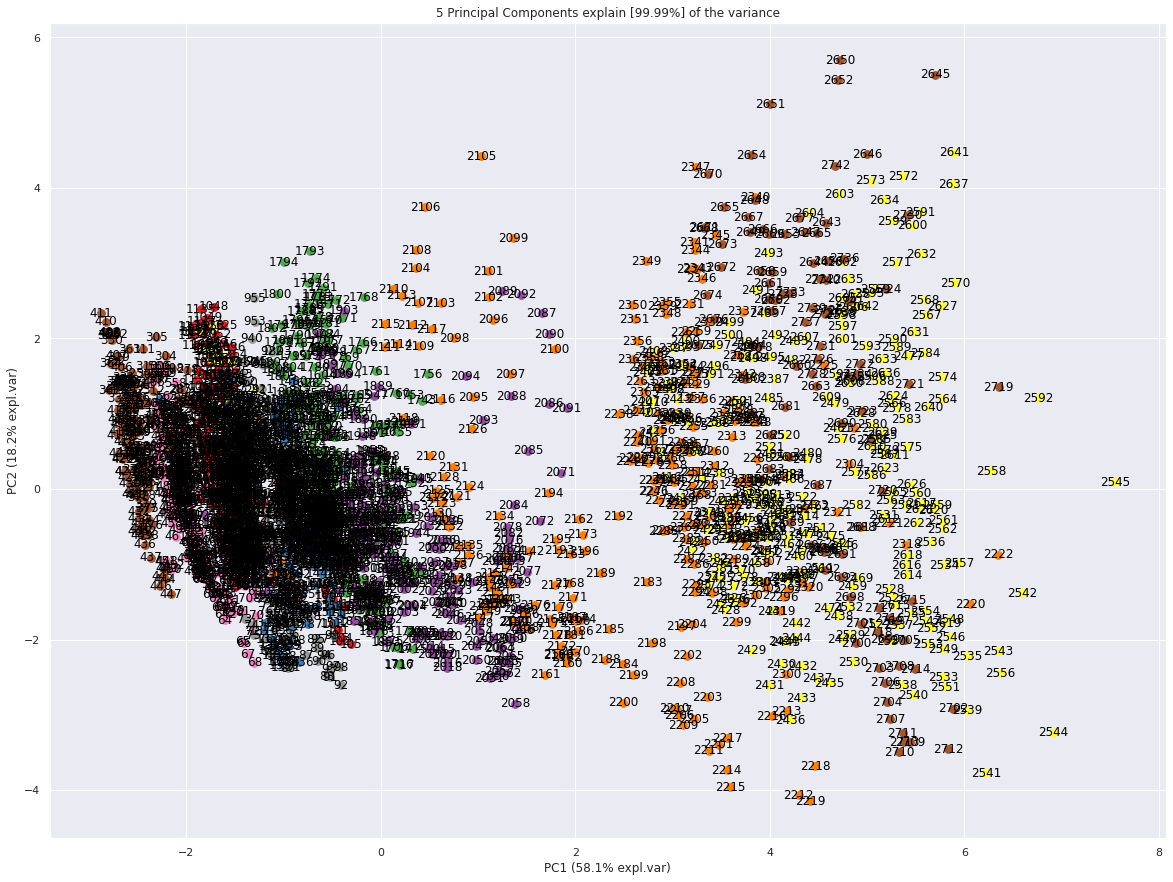

In [ ]:
model.scatter(label=True, legend=False)

**Eigenvectors**

In [ ]:
A = out['loadings'].T
A

PC1       PC2       PC3       PC4       PC5
H-L           0.372752  0.185532 -0.000030 -0.081310  0.296838
C-O           0.010267 -0.210975  0.959707 -0.093716 -0.138201
SMA_5         0.432384  0.038652  0.016885 -0.106409  0.035869
SMA_10        0.432129  0.050077  0.018575 -0.101157  0.036652
EMA_5         0.432356  0.038416  0.019582 -0.105471  0.037906
EMA_10        0.432135  0.049156  0.020645 -0.099956  0.040904
rsi           0.020716 -0.709127 -0.034977  0.180928  0.676332
MACD_12_26_9  0.124186 -0.618885 -0.275133 -0.453029 -0.522348
OBV           0.312625 -0.165208 -0.024520  0.839026 -0.395948

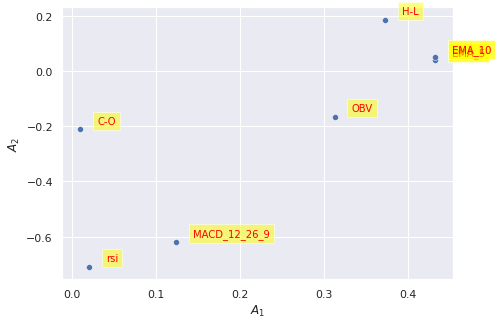

In [ ]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))

**Scree Plot**

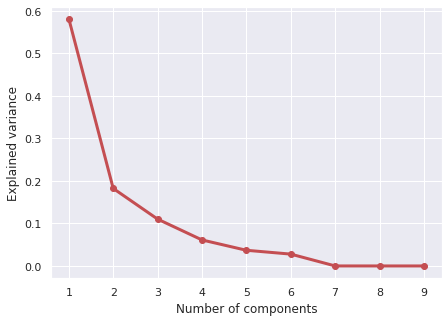

In [ ]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 
plt.show()

**Explained Variance Plot**

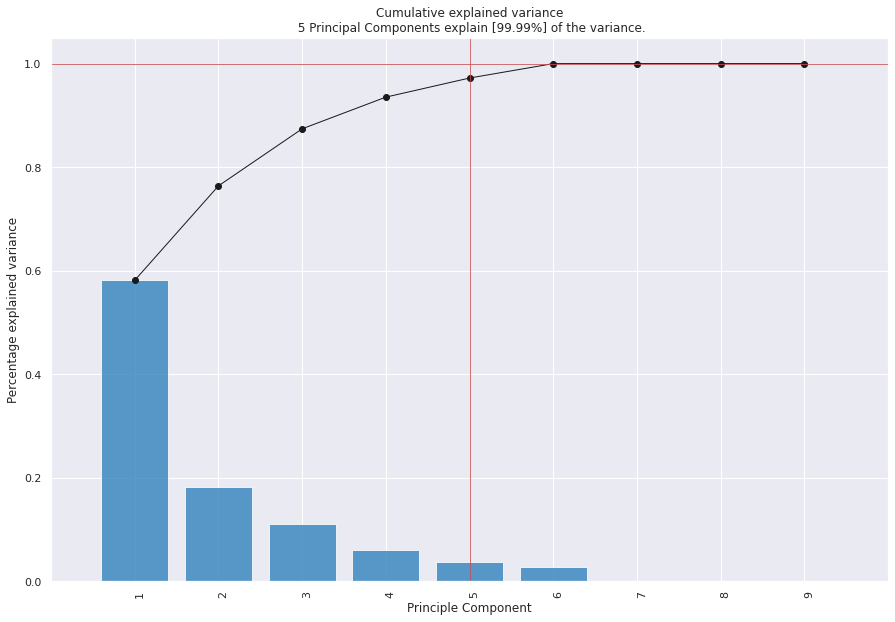

<Figure size 504x360 with 0 Axes>

In [ ]:
model.plot();

**Biplot**

[pca] >Plot PC1 vs PC2 with loadings.
[colourmap]> Warning: Colormap [Set1] can not create [2743] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [2743] unique colors! Available unique colors: [9].
[pca] >Set parameter "label=None" to ignore the labels and significanly speed up the scatter plot.


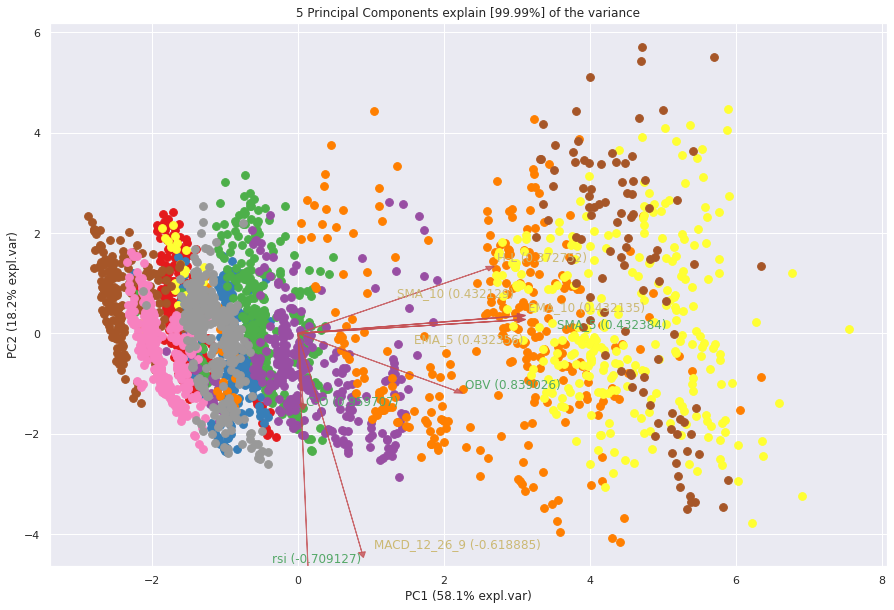

(<Figure size 1080x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f4937edaf10>)

In [ ]:
model.biplot(label=False, legend=False)

[pca] >Plot PC1 vs PC2 vs PC3 with loadings.
[colourmap]> Warning: Colormap [Set1] can not create [2743] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [2743] unique colors! Available unique colors: [9].
[pca] >Set parameter "label=None" to ignore the labels and significanly speed up the scatter plot.


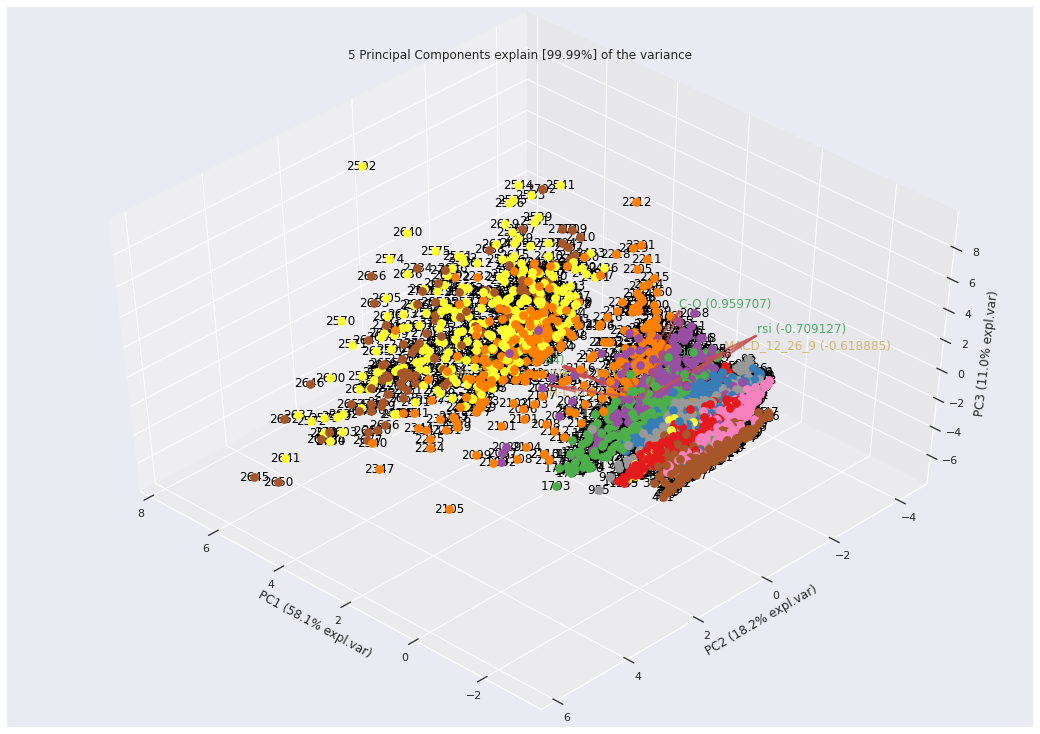

(<Figure size 1080x720 with 2 Axes>,
 <mpl_toolkits.mplot3d.axes3d.Axes3D at 0x7f4934720370>)

In [ ]:
model.biplot3d(legend=False)

#**Classification**

**Using PyCaret**

PyCaret uses interactive plotting ability. In order to render interactive plots in Google Colab, run the below line of code in your colab notebook.

In [ ]:
#For Google Colab only
from pycaret.utils import enable_colab 
enable_colab()

Colab mode enabled.


In order to demonstrate the predict_model() function on unseen data, a sample of 21 observations has been withheld from the original dataset to be used for predictions. This should not be confused with a train/test split as this particular split is performed to simulate a real life scenario. Another way to think about this is that these 21 records were not available at the time when the machine learning experiment was performed.

In [ ]:
data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (2469, 10)
Unseen Data For Predictions: (274, 10)


**Setting up the Environment in PyCaret**

The setup() function initializes the environment in pycaret and creates the transformation pipeline to prepare the data for modeling and deployment. setup() must be called before executing any other function in pycaret. It takes two mandatory parameters: a pandas dataframe and the name of the target column. All other parameters are optional and are used to customize the pre-processing pipeline (we will see them in later tutorials).

When setup() is executed, PyCaret's inference algorithm will automatically infer the data types for all features based on certain properties. The data type should be inferred correctly but this is not always the case. To account for this, PyCaret displays a table containing the features and their inferred data types after setup() is executed. If all of the data types are correctly identified enter can be pressed to continue or quit can be typed to end the expriment. Ensuring that the data types are correct is of fundamental importance in PyCaret as it automatically performs a few pre-processing tasks which are imperative to any machine learning experiment. These tasks are performed differently for each data type which means it is very important for them to be correctly configured.

In [ ]:
from pycaret.classification import *
clf = setup(data=data, target='Class', train_size=0.7, session_id=123)

Description             Value
0                               session_id               123
1                                   Target             Class
2                              Target Type        Multiclass
3                            Label Encoded              None
4                            Original Data        (2469, 10)
5                           Missing Values             False
6                         Numeric Features                 9
7                     Categorical Features                 0
8                         Ordinal Features             False
9                High Cardinality Features             False
10                 High Cardinality Method              None
11                   Transformed Train Set         (1728, 6)
12                    Transformed Test Set          (741, 6)
13                      Shuffle Train-Test              True
14                     Stratify Train-Test             False
15                          Fold Generator   StratifiedKFold
16                             Fold Number                10
17                                CPU Jobs                -1
18                                 Use GPU             False
19                          Log Experiment             False
20                         Experiment Name  clf-default-name
21                                     USI              413e
22                         Imputation Type            simple
23          Iterative Imputation Iteration              None
24                         Numeric Imputer              mean
25      Iterative Imputation Numeric Model              None
26                     Categorical Imputer          constant
27  Iterative Imputation Categorical Model              None
28           Unknown Categoricals Handling    least_frequent
29                               Normalize             False
30                        Normalize Method              None
31                          Transformation             False
32                   Transformation Method              None
33                                     PCA             False
34                              PCA Method              None
35                          PCA Components              None
36                     Ignore Low Variance             False
37                     Combine Rare Levels             False
38                    Rare Level Threshold              None
39                         Numeric Binning             False
40                         Remove Outliers             False
41                      Outliers Threshold              None
42                Remove Multicollinearity             False
43             Multicollinearity Threshold              None
44             Remove Perfect Collinearity              True
45                              Clustering             False
46                    Clustering Iteration              None
47                     Polynomial Features             False
48                       Polynomial Degree              None
49                    Trignometry Features             False
50                    Polynomial Threshold              None
51                          Group Features             False
52                       Feature Selection             False
53                Feature Selection Method           classic
54            Features Selection Threshold              None
55                     Feature Interaction             False
56                           Feature Ratio             False
57                   Interaction Threshold              None
58                           Fix Imbalance             False
59                    Fix Imbalance Method             SMOTE

INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='Class',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strate...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluste

Once the setup has been succesfully executed it prints the information grid which contains several important pieces of information. Most of the information is related to the pre-processing pipeline which is constructed when setup() is executed. The majority of these features are out of scope for the purposes of this tutorial however a few important things to note at this stage include:

* **session_id** : A pseduo-random number distributed as a seed in all functions for later reproducibility. If no session_id is passed, a random number is automatically generated that is distributed to all functions. In this experiment, the session_id is set as 123 for later reproducibility.

* **Target Type** : Binary or Multiclass. The Target type is automatically detected and shown. There is no difference in how the experiment is performed for Binary or Multiclass problems. All functionalities are identical.

* **Label Encoded** : When the Target variable is of type string (i.e. 'Yes' or 'No') instead of 1 or 0, it automatically encodes the label into 1 and 0 and displays the mapping (0 : No, 1 : Yes) for reference. 

* **Original Data** : Displays the original shape of the dataset. In this experiment (189, 8) means 189 samples and 8 features including the class column.

* **Missing Values** : When there are missing values in the original data this will show as True. For this experiment there are no missing values in the dataset.

* **Numeric Features** : The number of features inferred as numeric. In this dataset, 7 out of 8 features are inferred as numeric.

* **Categorical Features** : The number of features inferred as categorical. In this dataset, there are no categorical features.

* **Transformed Train Set** : Displays the shape of the transformed training set. Notice that the original shape of (189, 8) is transformed into (132, 7) for the transformed train set.

* **Transformed Test Set** : Displays the shape of the transformed test/hold-out set. There are 57 samples in test/hold-out set. This split is based on the default value of 70/30 that can be changed using the train_size parameter in setup.

Notice how a few tasks that are imperative to perform modeling are automatically handled such as missing value imputation, categorical encoding etc. Most of the parameters in setup() are optional and used for customizing the pre-processing pipeline. 

**Comparing All Models**

In [ ]:
 #show the best model and their statistics
 best_model = compare_models() 

Model  Accuracy     AUC  Recall   Prec.  \
gbc          Gradient Boosting Classifier    0.7153  0.8720  0.7068  0.7129   
rf               Random Forest Classifier    0.7124  0.8682  0.7044  0.7086   
et                 Extra Trees Classifier    0.7055  0.8658  0.6996  0.7062   
lightgbm  Light Gradient Boosting Machine    0.6927  0.8642  0.6854  0.6926   
ada                  Ada Boost Classifier    0.6771  0.8203  0.6644  0.6731   
dt               Decision Tree Classifier    0.6453  0.7336  0.6383  0.6457   
lda          Linear Discriminant Analysis    0.6377  0.8026  0.6298  0.6378   
ridge                    Ridge Classifier    0.5949  0.0000  0.5733  0.5811   
qda       Quadratic Discriminant Analysis    0.5735  0.7878  0.5756  0.6427   
dummy                    Dummy Classifier    0.3785  0.5000  0.3333  0.1432   
nb                            Naive Bayes    0.3733  0.5280  0.3308  0.2354   
lr                    Logistic Regression    0.3339  0.5061  0.3580  0.2098   
knn                K Neighbors Classifier    0.3299  0.4984  0.3333  0.3366   
svm                   SVM - Linear Kernel    0.3299  0.0000  0.3336  0.2187   

              F1   Kappa     MCC  TT (Sec)  
gbc       0.7117  0.5697  0.5717     0.829  
rf        0.7077  0.5655  0.5678     0.346  
et        0.7031  0.5559  0.5579     0.228  
lightgbm  0.6901  0.5362  0.5381     0.275  
ada       0.6689  0.5101  0.5153     0.127  
dt        0.6438  0.4646  0.4658     0.016  
lda       0.6362  0.4535  0.4546     0.013  
ridge     0.5425  0.3777  0.4047     0.011  
qda       0.5779  0.3645  0.3865     0.014  
dummy     0.2078  0.0000  0.0000     0.010  
nb        0.2262 -0.0042 -0.0054     0.011  
lr        0.2540  0.0327  0.0402     0.269  
knn       0.3262  0.0000 -0.0002     0.021  
svm       0.2595  0.0015  0.0009     0.026

INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


In [ ]:
best_model

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

**Create a Model**

create_model is the most granular function in PyCaret and is often the foundation behind most of the PyCaret functionalities. As the name suggests this function trains and evaluates a model using cross validation that can be set with fold parameter. The output prints a score grid that shows Accuracy, Recall, Precision, F1, Kappa and MCC by fold.

For the remaining part of this tutorial, we will work with the below models as our candidate models. The selections are for illustration purposes only and do not necessarily mean they are the top performing or ideal for this type of data.

* Decision Tree Classifier ('dt')
* K Neighbors Classifier ('knn')
* Logistic Regression ('lr')

There are many classifiers available in the model library of PyCaret. Please view the create_model() docstring for the list of all available models.

**Create Decision Tree Classifier**

In [ ]:
dt = create_model('rf')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.6127  0.7063  0.5985  0.6033  0.6025  0.4113  0.4156
1       0.5549  0.6681  0.5556  0.5590  0.5539  0.3334  0.3351
2       0.6994  0.7752  0.6973  0.6979  0.6974  0.5480  0.5491
3       0.7225  0.7916  0.7137  0.7223  0.7213  0.5807  0.5816
4       0.5954  0.6949  0.5899  0.6064  0.5987  0.3888  0.3901
5       0.6647  0.7497  0.6586  0.6661  0.6653  0.4950  0.4951
6       0.6358  0.7266  0.6253  0.6351  0.6346  0.4492  0.4498
7       0.6301  0.7207  0.6215  0.6251  0.6267  0.4400  0.4407
8       0.6337  0.7237  0.6242  0.6306  0.6311  0.4457  0.4465
9       0.7035  0.7792  0.6988  0.7115  0.7066  0.5540  0.5548
Mean    0.6453  0.7336  0.6383  0.6457  0.6438  0.4646  0.4658
SD      0.0498  0.0378  0.0497  0.0500  0.0506  0.0751  0.0746

INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 3
INFO:logs:DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')
INFO:logs:create_model() succesfully completed......................................


In [ ]:
#trained model object is stored in the variable 'dt'. 
dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

**Tune a Model:** How to automatically tune the hyper-parameters of a multiclass model. When a model is created using the create_model() function it uses the default hyperparameters. In order to tune hyperparameters, the tune_model() function is used. The tune_model() function is a random grid search of hyperparameters over a pre-defined search space. By default, it is set to optimize Accuracy but this can be changed using optimize parameter. This function automatically tunes the hyperparameters of a model on a pre-defined search space and scores it using stratified cross validation. The output prints a score grid that shows Accuracy, AUC, Recall, Precision, F1 and Kappa by fold.

**Tune Decision Tree Model**

In [ ]:
tuned_dt = tune_model(dt)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.6821  0.7966  0.6745  0.6808  0.6763  0.5198  0.5235
1       0.6185  0.8093  0.6164  0.6201  0.6180  0.4270  0.4280
2       0.7168  0.8632  0.7090  0.7089  0.7095  0.5714  0.5741
3       0.6879  0.8589  0.6757  0.6816  0.6839  0.5282  0.5288
4       0.6879  0.8271  0.6845  0.6841  0.6850  0.5295  0.5302
5       0.6821  0.8232  0.6802  0.6929  0.6857  0.5231  0.5246
6       0.7052  0.8659  0.6936  0.7031  0.7021  0.5529  0.5546
7       0.7341  0.8551  0.7206  0.7272  0.7268  0.5963  0.5995
8       0.7267  0.8290  0.7147  0.7202  0.7155  0.5848  0.5910
9       0.6977  0.8082  0.6855  0.6867  0.6866  0.5408  0.5455
Mean    0.6939  0.8337  0.6855  0.6906  0.6889  0.5374  0.5400
SD      0.0307  0.0241  0.0278  0.0281  0.0283  0.0447  0.0456

INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 4
INFO:logs:DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')
INFO:logs:tune_model() succesfully completed......................................


In [ ]:
#tuned model object is stored in the variable 'tuned_dt'. 
tuned_dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

**Evaluate Decision Tree Model**

Update statmodels

In [ ]:
!pip install statsmodels --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


How to analyze model performance using various plots

In [ ]:
evaluate_model(tuned_dt)

**Create K Neighbors Model**

In [ ]:
knn = create_model('knn')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.2890  0.4713  0.2929  0.2939  0.2830 -0.0596 -0.0614
1       0.3179  0.5045  0.3225  0.3363  0.3114 -0.0127 -0.0133
2       0.3468  0.5119  0.3484  0.3473  0.3434  0.0210  0.0212
3       0.3757  0.5423  0.3757  0.3806  0.3748  0.0625  0.0631
4       0.3642  0.5101  0.3693  0.3765  0.3618  0.0529  0.0541
5       0.3179  0.4796  0.3180  0.3239  0.3175 -0.0218 -0.0221
6       0.3237  0.4819  0.3319  0.3309  0.3171 -0.0038 -0.0039
7       0.2890  0.4664  0.2935  0.2979  0.2873 -0.0583 -0.0594
8       0.3547  0.5271  0.3541  0.3596  0.3562  0.0321  0.0322
9       0.3198  0.4889  0.3268  0.3190  0.3099 -0.0120 -0.0123
Mean    0.3299  0.4984  0.3333  0.3366  0.3262  0.0000 -0.0002
SD      0.0282  0.0236  0.0271  0.0283  0.0297  0.0399  0.0407

INFO:logs:create_model_container: 17
INFO:logs:master_model_container: 17
INFO:logs:display_container: 5
INFO:logs:KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')
INFO:logs:create_model() succesfully completed......................................


**Tune K Neighbors Model**

In [ ]:
tuned_knn = tune_model(knn, custom_grid = {'n_neighbors' : np.arange(0,50,1)})

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.3179  0.4591  0.3130  0.3161  0.3154 -0.0336 -0.0338
1       0.3699  0.5325  0.3626  0.3666  0.3673  0.0470  0.0471
2       0.3815  0.5483  0.3799  0.3826  0.3811  0.0673  0.0674
3       0.3988  0.5362  0.3863  0.3900  0.3872  0.0828  0.0846
4       0.3757  0.5163  0.3709  0.3752  0.3747  0.0561  0.0562
5       0.3179  0.4648  0.3157  0.3215  0.3193 -0.0260 -0.0261
6       0.3757  0.5425  0.3774  0.3770  0.3763  0.0582  0.0582
7       0.4220  0.5723  0.4147  0.4198  0.4191  0.1221  0.1226
8       0.3779  0.5234  0.3735  0.3759  0.3763  0.0602  0.0603
9       0.2907  0.4662  0.2892  0.2928  0.2878 -0.0691 -0.0700
Mean    0.3628  0.5162  0.3583  0.3618  0.3605  0.0365  0.0367
SD      0.0387  0.0374  0.0372  0.0370  0.0379  0.0565  0.0570

INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 6
INFO:logs:KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=22, p=2,
                     weights='uniform')
INFO:logs:tune_model() succesfully completed......................................


**Evaluate K Neighbors Model**

In [ ]:
evaluate_model(tuned_knn)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=22, p=2,
                     weights='uniform'), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Create Logistic Regression Model**

In [ ]:
lr = create_model('lr')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.3353  0.5264  0.3595  0.2103  0.2547  0.0354  0.0435
1       0.3526  0.5433  0.3569  0.2418  0.2777  0.0308  0.0370
2       0.3353  0.5212  0.3588  0.2119  0.2575  0.0350  0.0424
3       0.3526  0.5282  0.3796  0.2207  0.2681  0.0618  0.0755
4       0.3353  0.5180  0.3634  0.2072  0.2537  0.0397  0.0484
5       0.3526  0.4547  0.3837  0.2160  0.2616  0.0661  0.0830
6       0.3295  0.4840  0.3587  0.1997  0.2434  0.0326  0.0408
7       0.3064  0.4679  0.3314  0.1896  0.2333 -0.0029 -0.0036
8       0.3198  0.5098  0.3442  0.1989  0.2439  0.0143  0.0172
9       0.3198  0.5078  0.3435  0.2024  0.2460  0.0145  0.0176
Mean    0.3339  0.5061  0.3580  0.2098  0.2540  0.0327  0.0402
SD      0.0149  0.0269  0.0151  0.0137  0.0124  0.0199  0.0247

INFO:logs:create_model_container: 19
INFO:logs:master_model_container: 19
INFO:logs:display_container: 7
INFO:logs:LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:create_model() succesfully completed......................................


**Tune Logistic Regression Model**

In [ ]:
tuned_lr = tune_model(lr)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.3526  0.5264  0.3535  0.2470  0.2829  0.0291  0.0345
1       0.3526  0.4774  0.3569  0.2418  0.2777  0.0308  0.0370
2       0.3295  0.5337  0.3295  0.2275  0.2644 -0.0086 -0.0101
3       0.3757  0.5282  0.3795  0.2607  0.3010  0.0669  0.0791
4       0.3699  0.5310  0.3695  0.2601  0.2995  0.0536  0.0629
5       0.3526  0.5313  0.3837  0.2160  0.2616  0.0661  0.0830
6       0.3931  0.5174  0.3951  0.2855  0.3185  0.0941  0.1137
7       0.3064  0.5057  0.3314  0.1896  0.2333 -0.0029 -0.0036
8       0.3547  0.5147  0.3526  0.2478  0.2878  0.0291  0.0339
9       0.3081  0.5078  0.3090  0.2128  0.2476 -0.0395 -0.0461
Mean    0.3495  0.5174  0.3560  0.2389  0.2774  0.0319  0.0384
SD      0.0265  0.0164  0.0256  0.0265  0.0247  0.0383  0.0461

INFO:logs:create_model_container: 20
INFO:logs:master_model_container: 20
INFO:logs:display_container: 8
INFO:logs:LogisticRegression(C=0.049, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


**Evaluate Logistic Regression Model**

In [ ]:
evaluate_model(tuned_lr)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=LogisticRegression(C=0.049, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Create Random Forest Model**

In [ ]:
rf = create_model('rf')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.7225  0.8747  0.7141  0.7192  0.7186  0.5801  0.5820
1       0.6416  0.8164  0.6400  0.6454  0.6359  0.4628  0.4686
2       0.6994  0.8816  0.6876  0.6835  0.6826  0.5437  0.5508
3       0.7341  0.8967  0.7255  0.7308  0.7311  0.5989  0.6000
4       0.6763  0.8575  0.6694  0.6773  0.6765  0.5110  0.5112
5       0.6994  0.8706  0.6895  0.6926  0.6950  0.5460  0.5469
6       0.7110  0.8723  0.7017  0.7064  0.7080  0.5630  0.5636
7       0.7572  0.8821  0.7462  0.7536  0.7510  0.6310  0.6349
8       0.7326  0.8607  0.7279  0.7298  0.7306  0.5967  0.5972
9       0.7500  0.8695  0.7420  0.7470  0.7477  0.6220  0.6227
Mean    0.7124  0.8682  0.7044  0.7086  0.7077  0.5655  0.5678
SD      0.0332  0.0203  0.0318  0.0323  0.0340  0.0492  0.0484

INFO:logs:create_model_container: 21
INFO:logs:master_model_container: 21
INFO:logs:display_container: 9
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)
INFO:logs:create_model() succesfully completed......................................


**Tune Random Forest Model**

In [ ]:
tuned_rf = tune_model(rf)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.6821  0.8735  0.6705  0.6760  0.6739  0.5178  0.5218
1       0.6416  0.8071  0.6370  0.6414  0.6364  0.4617  0.4656
2       0.7283  0.8924  0.7225  0.7215  0.7235  0.5901  0.5913
3       0.7168  0.8743  0.7077  0.7131  0.7143  0.5724  0.5730
4       0.6763  0.8646  0.6704  0.6776  0.6769  0.5119  0.5119
5       0.6936  0.8604  0.6859  0.6907  0.6915  0.5382  0.5388
6       0.6994  0.8766  0.6879  0.6924  0.6941  0.5446  0.5461
7       0.7630  0.8818  0.7482  0.7610  0.7548  0.6388  0.6455
8       0.7267  0.8588  0.7178  0.7167  0.7182  0.5866  0.5895
9       0.7267  0.8743  0.7170  0.7230  0.7236  0.5864  0.5876
Mean    0.7055  0.8664  0.6965  0.7013  0.7007  0.5549  0.5571
SD      0.0324  0.0219  0.0307  0.0313  0.0316  0.0478  0.0483

INFO:logs:create_model_container: 22
INFO:logs:master_model_container: 22
INFO:logs:display_container: 10
INFO:logs:RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=6, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.001,
                       min_impurity_split=None, min_samples_leaf=6,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       n_estimators=190, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


**Evaluate Random Forest Model**

In [ ]:
evaluate_model(tuned_rf)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=6, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.001,
                       min_impurity_split=None, min_samples_leaf=6,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       n_estimators=190, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

#**Tune the Best Model**

In [ ]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model = tune_model(best_model)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.7341  0.8818  0.7241  0.7329  0.7280  0.5969  0.6012
1       0.6416  0.8122  0.6360  0.6394  0.6366  0.4611  0.4641
2       0.7225  0.8960  0.7125  0.7107  0.7094  0.5795  0.5853
3       0.7457  0.8956  0.7371  0.7427  0.7422  0.6158  0.6175
4       0.6763  0.8660  0.6650  0.6698  0.6713  0.5091  0.5106
5       0.6936  0.8669  0.6838  0.6908  0.6921  0.5375  0.5376
6       0.7283  0.8944  0.7162  0.7243  0.7200  0.5869  0.5918
7       0.7861  0.8979  0.7704  0.7883  0.7764  0.6736  0.6833
8       0.7267  0.8632  0.7189  0.7221  0.7215  0.5865  0.5888
9       0.7558  0.8808  0.7467  0.7532  0.7522  0.6299  0.6321
Mean    0.7211  0.8755  0.7111  0.7174  0.7150  0.5777  0.5812
SD      0.0392  0.0247  0.0377  0.0404  0.0384  0.0582  0.0596

INFO:logs:create_model_container: 23
INFO:logs:master_model_container: 23
INFO:logs:display_container: 11
INFO:logs:GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.01, loss='deviance', max_depth=7,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.05, min_impurity_split=None,
                           min_samples_leaf=2, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=140,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=123, subsample=0.35, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


In [ ]:
tuned_best_model

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.01, loss='deviance', max_depth=7,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.05, min_impurity_split=None,
                           min_samples_leaf=2, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=140,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=123, subsample=0.35, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

**Evaluate the Best Model**

One way to analyze the performance of models is to use the evaluate_model() function which displays a user interface for all of the available plots for a given model. It internally uses the plot_model() function.

In [ ]:
evaluate_model(tuned_best_model)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.01, loss='deviance', max_depth=7,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.05, min_impurity_split=None,
                           min_samples_leaf=2, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=140,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=123, subsample=0.35, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

#**Classification + PCA**

In [ ]:
clf_pca = setup(data=data, target='Class', train_size=0.7, session_id=123, normalize = True, pca = True, pca_components = 3)

Description             Value
0                               session_id               123
1                                   Target             Class
2                              Target Type        Multiclass
3                            Label Encoded              None
4                            Original Data        (2469, 10)
5                           Missing Values             False
6                         Numeric Features                 9
7                     Categorical Features                 0
8                         Ordinal Features             False
9                High Cardinality Features             False
10                 High Cardinality Method              None
11                   Transformed Train Set         (1728, 3)
12                    Transformed Test Set          (741, 3)
13                      Shuffle Train-Test              True
14                     Stratify Train-Test             False
15                          Fold Generator   StratifiedKFold
16                             Fold Number                10
17                                CPU Jobs                -1
18                                 Use GPU             False
19                          Log Experiment             False
20                         Experiment Name  clf-default-name
21                                     USI              3588
22                         Imputation Type            simple
23          Iterative Imputation Iteration              None
24                         Numeric Imputer              mean
25      Iterative Imputation Numeric Model              None
26                     Categorical Imputer          constant
27  Iterative Imputation Categorical Model              None
28           Unknown Categoricals Handling    least_frequent
29                               Normalize              True
30                        Normalize Method            zscore
31                          Transformation             False
32                   Transformation Method              None
33                                     PCA              True
34                              PCA Method            linear
35                          PCA Components                 3
36                     Ignore Low Variance             False
37                     Combine Rare Levels             False
38                    Rare Level Threshold              None
39                         Numeric Binning             False
40                         Remove Outliers             False
41                      Outliers Threshold              None
42                Remove Multicollinearity             False
43             Multicollinearity Threshold              None
44             Remove Perfect Collinearity              True
45                              Clustering             False
46                    Clustering Iteration              None
47                     Polynomial Features             False
48                       Polynomial Degree              None
49                    Trignometry Features             False
50                    Polynomial Threshold              None
51                          Group Features             False
52                       Feature Selection             False
53                Feature Selection Method           classic
54            Features Selection Threshold              None
55                     Feature Interaction             False
56                           Feature Ratio             False
57                   Interaction Threshold              None
58                           Fix Imbalance             False
59                    Fix Imbalance Method             SMOTE

INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='Class',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strate...
                ('dummy', Dummify(target='Class')),
                ('fix_perfect', Remove_100(target='Class')),
                ('clean_names', Clean_Colum_Names()),
       

In [ ]:
#show the best model and their statistics
best_model_pca = compare_models()

Model  Accuracy     AUC  Recall   Prec.  \
gbc          Gradient Boosting Classifier    0.6985  0.8651  0.6895  0.6958   
rf               Random Forest Classifier    0.6852  0.8540  0.6757  0.6833   
lightgbm  Light Gradient Boosting Machine    0.6806  0.8536  0.6724  0.6797   
ada                  Ada Boost Classifier    0.6800  0.8105  0.6719  0.6856   
lr                    Logistic Regression    0.6777  0.8400  0.6616  0.6667   
knn                K Neighbors Classifier    0.6765  0.8282  0.6725  0.6827   
et                 Extra Trees Classifier    0.6742  0.8443  0.6657  0.6727   
lda          Linear Discriminant Analysis    0.6314  0.7998  0.6233  0.6449   
dt               Decision Tree Classifier    0.6279  0.7208  0.6205  0.6285   
svm                   SVM - Linear Kernel    0.6250  0.0000  0.6056  0.6131   
ridge                    Ridge Classifier    0.5961  0.0000  0.5694  0.5468   
qda       Quadratic Discriminant Analysis    0.5469  0.7973  0.5574  0.6634   
nb                            Naive Bayes    0.4873  0.7934  0.5039  0.6371   
dummy                    Dummy Classifier    0.3785  0.5000  0.3333  0.1432   

              F1   Kappa     MCC  TT (Sec)  
gbc       0.6945  0.5445  0.5466     0.550  
rf        0.6811  0.5243  0.5268     0.545  
lightgbm  0.6785  0.5180  0.5193     0.233  
ada       0.6781  0.5167  0.5201     0.114  
lr        0.6625  0.5093  0.5176     0.248  
knn       0.6758  0.5142  0.5164     0.114  
et        0.6708  0.5080  0.5100     0.487  
lda       0.6333  0.4444  0.4477     0.014  
dt        0.6268  0.4386  0.4396     0.018  
svm       0.5670  0.4267  0.4646     0.062  
ridge     0.5272  0.3754  0.4142     0.011  
qda       0.5479  0.3316  0.3726     0.013  
nb        0.4771  0.2496  0.3023     0.014  
dummy     0.2078  0.0000  0.0000     0.013

INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


In [ ]:
best_model_pca

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

**Tune the Best Model**

In [ ]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model_pca = tune_model(best_model_pca)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.7225  0.8814  0.7120  0.7206  0.7166  0.5792  0.5832
1       0.6358  0.8030  0.6288  0.6336  0.6301  0.4520  0.4556
2       0.7283  0.8964  0.7220  0.7255  0.7266  0.5900  0.5903
3       0.7110  0.8892  0.6987  0.7042  0.7063  0.5633  0.5644
4       0.7110  0.8671  0.7038  0.7127  0.7113  0.5634  0.5638
5       0.6994  0.8653  0.6913  0.6973  0.6981  0.5468  0.5470
6       0.7052  0.8833  0.6984  0.7049  0.7042  0.5537  0.5545
7       0.7341  0.8910  0.7168  0.7325  0.7230  0.5938  0.6033
8       0.7093  0.8590  0.6990  0.7009  0.6975  0.5592  0.5649
9       0.7267  0.8964  0.7129  0.7253  0.7211  0.5848  0.5893
Mean    0.7083  0.8732  0.6984  0.7057  0.7035  0.5586  0.5616
SD      0.0264  0.0265  0.0249  0.0266  0.0263  0.0386  0.0391

INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 3
INFO:logs:GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.01, loss='deviance', max_depth=7,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.05, min_impurity_split=None,
                           min_samples_leaf=2, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=140,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=123, subsample=0.35, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


In [ ]:
tuned_best_model_pca

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.01, loss='deviance', max_depth=7,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.05, min_impurity_split=None,
                           min_samples_leaf=2, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=140,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=123, subsample=0.35, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

**Evaluate the Best Model**

One way to analyze the performance of models is to use the evaluate_model() function which displays a user interface for all of the available plots for a given model. It internally uses the plot_model() function.

In [ ]:
evaluate_model(tuned_best_model_pca)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.01, loss='deviance', max_depth=7,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.05, min_impurity_split=None,
                           min_samples_leaf=2, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=140,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=123, subsample=0.35, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Note:** The AUC metric is not available for Multiclass classification however the column will still be shown with zero values to maintain consistency between the Binary Classification and Multiclass Classification display grids.

#**Explainable AI with Shapley values**

Shapley values are a widely used approach from cooperative game theory that come with desirable properties.

In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
print("Numpy version: ", np.__version__)

Numpy version:  1.19.5


In [ ]:
!pip install numba==0.53

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import shap

In [ ]:
rf_pca = create_model('rf')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.7052  0.8626  0.6959  0.7010  0.7020  0.5544  0.5553
1       0.5780  0.7733  0.5754  0.5897  0.5764  0.3687  0.3733
2       0.6936  0.8757  0.6838  0.6874  0.6897  0.5372  0.5378
3       0.7225  0.8816  0.7136  0.7209  0.7210  0.5818  0.5824
4       0.6358  0.8362  0.6232  0.6250  0.6288  0.4480  0.4493
5       0.6647  0.8354  0.6586  0.6651  0.6646  0.4952  0.4954
6       0.6936  0.8716  0.6873  0.6970  0.6945  0.5370  0.5376
7       0.7630  0.8959  0.7502  0.7659  0.7561  0.6386  0.6463
8       0.6919  0.8382  0.6804  0.6801  0.6807  0.5327  0.5368
9       0.7035  0.8698  0.6889  0.7004  0.6972  0.5494  0.5537
Mean    0.6852  0.8540  0.6757  0.6833  0.6811  0.5243  0.5268
SD      0.0477  0.0332  0.0457  0.0464  0.0471  0.0701  0.0706

INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 4
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [ ]:
tuned_rf_pca = tune_model(rf_pca)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.6994  0.8651  0.6889  0.7064  0.6850  0.5444  0.5561
1       0.6012  0.7871  0.5976  0.5954  0.5927  0.4008  0.4047
2       0.7457  0.8689  0.7395  0.7420  0.7434  0.6164  0.6167
3       0.7052  0.8377  0.6957  0.7015  0.7021  0.5553  0.5563
4       0.6647  0.8250  0.6538  0.6592  0.6611  0.4923  0.4931
5       0.7225  0.8572  0.7159  0.7209  0.7210  0.5821  0.5827
6       0.7052  0.8561  0.6970  0.7031  0.7032  0.5536  0.5544
7       0.7341  0.8634  0.7199  0.7295  0.7235  0.5953  0.6018
8       0.6977  0.8267  0.6852  0.6884  0.6833  0.5417  0.5489
9       0.7384  0.8626  0.7269  0.7316  0.7313  0.6034  0.6065
Mean    0.7014  0.8450  0.6920  0.6978  0.6947  0.5485  0.5521
SD      0.0404  0.0246  0.0391  0.0410  0.0414  0.0600  0.0598

INFO:logs:create_model_container: 17
INFO:logs:master_model_container: 17
INFO:logs:display_container: 5
INFO:logs:RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                       criterion='entropy', max_depth=5, max_features=1.0,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


**SHAP Summary Plot**

Rather than using a typical feature importance bar chart, we use a density scatter plot of SHAP values for each feature to identify how much impact each feature has on the model output for individuals in the validation dataset. Features are sorted by the sum of the SHAP value magnitudes across all samples. 

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=6, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.001,
                       min_impurity_split=None, min_samples_leaf=6,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       n_estimators=190, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False), use_train_data=False, X_new_sample=None, y_new_sample=None, feature=None, kwargs={}, observation=None, plot=summary, save=False)
INFO:logs:Checking exceptions
INFO:logs:plot type: summary
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values


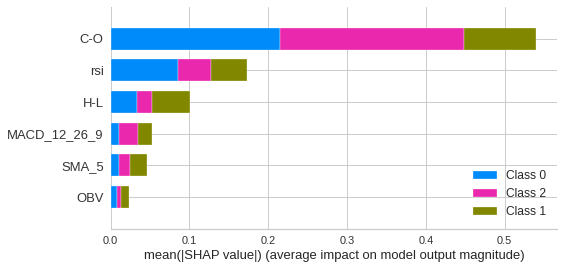

INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................


In [ ]:
interpret_model(tuned_rf_pca, plot='summary')

In [ ]:
#explainer = shap.TreeExplainer(tuned_rf_pca)
#X = df.drop('class', axis=1)
#shap_values = explainer.shap_values(X)
#shap.summary_plot(shap_values, X)

**Visualize a single prediction**

In [ ]:
interpret_model(tuned_rf_pca, plot='reason', observation=32)

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=6, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.001,
                       min_impurity_split=None, min_samples_leaf=6,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       n_estimators=190, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False), use_train_data=False, X_new_sample=None, y_new_sample=None, feature=None, kwargs={}, observation=32, plot=reason, save=False)
INFO:logs:Checking exceptions
INFO:logs:plot type: reason
INFO:logs:model type detected: type 1
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values
INFO:logs:model type detected: Unknown


INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................


From the above the plot, we can seethe "base value," which is defined as the mean predicted target; and f(x), which is the prediction for a selected observation (i.e. observation number 32). The red-colored features increased the predicted value, while the blue-colored features decreased it. The size of each feature (i.e. Principal Component) indicates the impact it has on the model.

**Visualize many predictions**

In [ ]:
interpret_model(tuned_rf_pca, plot='reason')

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=6, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.001,
                       min_impurity_split=None, min_samples_leaf=6,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       n_estimators=190, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False), use_train_data=False, X_new_sample=None, y_new_sample=None, feature=None, kwargs={}, observation=None, plot=reason, save=False)
INFO:logs:Checking exceptions
INFO:logs:plot type: reason
INFO:logs:model type detected: type 1
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values


INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................
